### K-Nearest Neighbors Algorithm

#### What is K-Nearest Neighbors Algorithm? 

K-Nearest Neighbour is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure.

#### Iris data set

https://gist.github.com/netj/8836201

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/iris.csv")

In [3]:
df.shape

(150, 5)

In [4]:
df.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [19]:
df.describe()

sepal.length  sepal.width  petal.length  petal.width  distance_sq
count    150.000000   150.000000    150.000000   150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333     5.343733
std        0.828066     0.435866      1.765298     0.762238     6.085981
min        4.300000     2.000000      1.000000     0.100000     0.000000
25%        5.100000     2.800000      1.600000     0.300000     0.492500
50%        5.800000     3.000000      4.350000     1.300000     1.275000
75%        6.400000     3.300000      5.100000     1.800000    12.610000
max        7.900000     4.400000      6.900000     2.500000    18.100000

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
 5   distance_sq   150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


<img src="images/iris_flower.png"></img>

<img src="images/iris_three_flowers.png"></img>

In [5]:
df.value_counts(df.variety)

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

<Axes: >

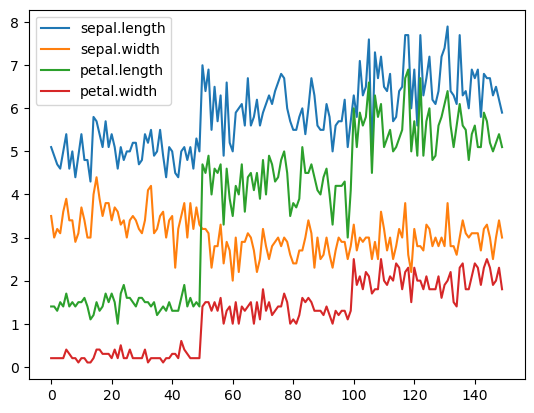

In [6]:
df.plot(kind='line')

https://makeshiftinsights.com/blog/classification-keras-iris/

In [7]:
import seaborn
import matplotlib.pyplot as plt
seaborn.pairplot(df, hue="variety")
plt.show()

<Axes: xlabel='petal.length', ylabel='sepal.length'>

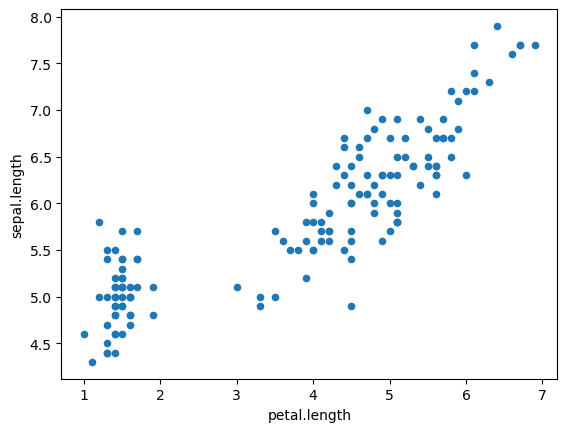

In [8]:
df.plot(kind='scatter', x = 'petal.length', y = 'sepal.length')

# EDA - Exploratory Data Analysis

In [9]:
ax1 = df[df.variety == 'Setosa'].plot(kind='scatter', x='petal.length', 
                                      y='sepal.length', color='r', label='Setosa') 

ax2 = df[df.variety == 'Versicolor'].plot(kind='scatter', x='petal.length', 
                                          y='sepal.length', color='g', label='Versicolor', ax=ax1)  

ax3 = df[df.variety == 'Virginica'].plot(kind='scatter', x='petal.length', 
                                         y='sepal.length', color='b', label='Virginica', ax=ax1)

https://www.engati.com/glossary/euclidean-distance


<img src="images/Euclidean-distance.jpg"></img>

In [22]:
# P1
sepal_length = 3 # x1
petal_length = 1.4 # y1

# P2 (1-150)
labeled_sepal_length = 5.1 # x2
labeled_petal_length = 1.4 # y2

# sepal.length = 5.1
# 3.5
# petal.length = 1.4
# 0.2
# variety -> Setosa
distance_sq = (labeled_sepal_length - sepal_length) ** 2 + (labeled_petal_length - petal_length) ** 2

In [23]:
distance_sq

4.409999999999998

In [10]:
sepal_length = 3
petal_length = 1.4


df['distance_sq'] = (df['petal.length'] - petal_length) ** 2 + (df['sepal.length'] - sepal_length) ** 2

In [11]:
df.head()

sepal.length  sepal.width  petal.length  petal.width variety  distance_sq
0           5.1          3.5           1.4          0.2  Setosa         4.41
1           4.9          3.0           1.4          0.2  Setosa         3.61
2           4.7          3.2           1.3          0.2  Setosa         2.90
3           4.6          3.1           1.5          0.2  Setosa         2.57
4           5.0          3.6           1.4          0.2  Setosa         4.00

In [12]:
df.tail()

sepal.length  sepal.width  petal.length  petal.width    variety  \
145           6.7          3.0           5.2          2.3  Virginica   
146           6.3          2.5           5.0          1.9  Virginica   
147           6.5          3.0           5.2          2.0  Virginica   
148           6.2          3.4           5.4          2.3  Virginica   
149           5.9          3.0           5.1          1.8  Virginica   

     distance_sq  
145        28.13  
146        23.85  
147        26.69  
148        26.24  
149        22.10

In [13]:
#sepal_length = 3
#petal_length = 1.4

df.sort_values(['distance_sq']).head()

sepal.length  sepal.width  petal.length  petal.width variety  distance_sq
13           4.3          3.0           1.1          0.1  Setosa         1.78
8            4.4          2.9           1.4          0.2  Setosa         1.96
38           4.4          3.0           1.3          0.2  Setosa         1.97
42           4.4          3.2           1.3          0.2  Setosa         1.97
41           4.5          2.3           1.3          0.3  Setosa         2.26

In [14]:
df.sort_values(['distance_sq']).tail()

sepal.length  sepal.width  petal.length  petal.width    variety  \
105           7.6          3.0           6.6          2.1  Virginica   
131           7.9          3.8           6.4          2.0  Virginica   
122           7.7          2.8           6.7          2.0  Virginica   
117           7.7          3.8           6.7          2.2  Virginica   
118           7.7          2.6           6.9          2.3  Virginica   

     distance_sq  
105        48.20  
131        49.01  
122        50.18  
117        50.18  
118        52.34

In [15]:
sepal_length = 6
petal_length = 5

df['distance_sq'] = (df['petal.length'] - petal_length) ** 2 + (df['sepal.length'] - sepal_length) ** 2
df.sort_values(['distance_sq']).head()

sepal.length  sepal.width  petal.length  petal.width     variety  \
119           6.0          2.2           5.0          1.5   Virginica   
83            6.0          2.7           5.1          1.6  Versicolor   
149           5.9          3.0           5.1          1.8   Virginica   
127           6.1          3.0           4.9          1.8   Virginica   
138           6.0          3.0           4.8          1.8   Virginica   

     distance_sq  
119         0.00  
83          0.01  
149         0.02  
127         0.02  
138         0.04

In [16]:
df.sort_values(['distance_sq']).head(10)

sepal.length  sepal.width  petal.length  petal.width     variety  \
119           6.0          2.2           5.0          1.5   Virginica   
83            6.0          2.7           5.1          1.6  Versicolor   
149           5.9          3.0           5.1          1.8   Virginica   
127           6.1          3.0           4.9          1.8   Virginica   
138           6.0          3.0           4.8          1.8   Virginica   
114           5.8          2.8           5.1          2.4   Virginica   
70            5.9          3.2           4.8          1.8  Versicolor   
142           5.8          2.7           5.1          1.9   Virginica   
101           5.8          2.7           5.1          1.9   Virginica   
126           6.2          2.8           4.8          1.8   Virginica   

     distance_sq  
119         0.00  
83          0.01  
149         0.02  
127         0.02  
138         0.04  
114         0.05  
70          0.05  
142         0.05  
101         0.05  
126         0.08

In [17]:
# scikit-learn
import sklearn

from sklearn.neighbors import KNeighborsClassifier

In [24]:
nums = [2, 4, 1, 5, 3]

sorted(nums)

[1, 2, 3, 4, 5]

In [26]:
# 0 - 4(5 nos.)
for i in range(len(nums)):
    # 1 - 4(4 nos) 
    for j in range(i + 1, len(nums)):
        # 2(ith index) > 4 (jth index)
        if nums[i] > nums[j]:
            nums[i], nums[j] = nums[j], nums[i]
print(nums)

[1, 2, 3, 4, 5]
